# Images and Classifiers for Devanagari digits

# Check the following dataset:
# https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset

# Read images from Train/digit_X; convert to gray-scale values; attach label

In [1]:
# Your code here ...
# train about 100 images per digit
# afterwards, you can increase it

In [2]:
# install tensorflow through anaconda navigator
# installing cv2
# pip install opencv-python
# this had to be done from the anaconda prompt
# use tutorial for cats and dogs https://www.youtube.com/watch?v=j-3vuBynnOE

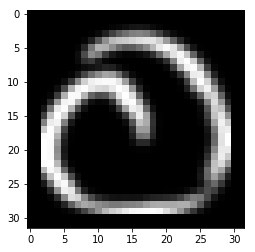

In [4]:
# Read images from Train/digit_X
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/bulatao/Documents/GitHub/Data-Science-Classes/DevanagariHandwrittenCharacterDataset/Train"

CATEGORIES = ["digit_0", "digit_1","digit_2","digit_3","digit_4","digit_5","digit_6","digit_7","digit_8","digit_9"]

for category in CATEGORIES:  # 0 through 9
    path = os.path.join(DATADIR,category)  # create path to folders with samples
    for img in os.listdir(path):  # iterate over each image 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!


In [5]:
print(img_array) # let's see what this looks like

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [6]:
print(img_array.shape)

(32, 32)


In [7]:
# read images and add labels and create complete dataset

training_data = []

IMG_SIZE = 32

def create_training_data():
    for category in CATEGORIES:  # for digits 0 to 9

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0 = digit_0, 1 = digit_1

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1700/1700 [00:03<00:00, 520.95it/s]


17000


In [8]:
import random # this didn't seem to affect accuracy too much, but was recommended

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

8
5
1
4
3
4
9
8
4
7


In [9]:
# Create Training Data and Labels
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) 

X = np.array(X)
y = np.array(y)
X[1] # check what it looks like

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
X.shape

(17000, 32, 32)

# Read images from Test/digit_X; convert to gray-scale values; attach label

In [11]:
# Your code here ...
# read test images same way we did training images

test_data = []

def create_test_data():
    for category in CATEGORIES:  # for digits 0 to 9

        path = os.path.join("C:/Users/bulatao/Documents/GitHub/Data-Science-Classes/DevanagariHandwrittenCharacterDataset/Test",category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0 = digit_0, 1 = digit_1

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                #new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                test_data.append([img_array, class_num])  # add this to our test_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_test_data()

print(len(test_data))

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 536.32it/s]


3000


In [12]:
# shuffle test data
random.shuffle(test_data)
for sample in test_data[:10]:
    print(sample[1])

8
0
4
1
1
2
9
9
7
4


In [13]:
# Create Test Data and Labels
X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

#print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1)) 

X_test = np.array(X_test) # change from list to np array
y_test = np.array(y_test)

# Build the classifiers using steps from MNIST classifiers

In [14]:
# Your code here ...
# Here's a TensorFlow image classifier with Keras
# https://pythonprogramming.net/convolutional-neural-network-deep-learning-python-tensorflow-keras/

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
tf.enable_eager_execution() # this is necessary later when trying to pickle this model
import sklearn.metrics as metrics

In [16]:
# let's normalize the data
# this portion here made a huge difference in accuracy
X = tf.keras.utils.normalize(X, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [24]:
import pickle # we'll need this later to save models

In [43]:
# build the model
# reference here: https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=5)

Epoch 1/5
17000/17000 [==============================] - ETA: 4:25 - loss: 2.3229 - acc: 0.0000e+0 - ETA: 26s - loss: 2.0867 - acc: 0.3580    - ETA: 16s - loss: 1.8538 - acc: 0.48 - ETA: 11s - loss: 1.6016 - acc: 0.57 - ETA: 9s - loss: 1.3681 - acc: 0.6343 - ETA: 8s - loss: 1.2637 - acc: 0.658 - ETA: 8s - loss: 1.1770 - acc: 0.679 - ETA: 7s - loss: 1.0689 - acc: 0.703 - ETA: 6s - loss: 0.9909 - acc: 0.723 - ETA: 6s - loss: 0.9452 - acc: 0.733 - ETA: 5s - loss: 0.8804 - acc: 0.751 - ETA: 5s - loss: 0.8372 - acc: 0.762 - ETA: 5s - loss: 0.8011 - acc: 0.771 - ETA: 4s - loss: 0.7568 - acc: 0.784 - ETA: 4s - loss: 0.7207 - acc: 0.794 - ETA: 4s - loss: 0.6930 - acc: 0.800 - ETA: 4s - loss: 0.6598 - acc: 0.809 - ETA: 3s - loss: 0.6359 - acc: 0.816 - ETA: 3s - loss: 0.6150 - acc: 0.822 - ETA: 3s - loss: 0.5949 - acc: 0.827 - ETA: 3s - loss: 0.5731 - acc: 0.833 - ETA: 3s - loss: 0.5623 - acc: 0.835 - ETA: 3s - loss: 0.5501 - acc: 0.839 - ETA: 3s - loss: 0.5327 - acc: 0.844 - ETA: 2s - loss: 0.5

17000/17000 [==============================] - ETA: 4s - loss: 0.0195 - acc: 1.000 - ETA: 2s - loss: 0.0770 - acc: 0.974 - ETA: 2s - loss: 0.0635 - acc: 0.981 - ETA: 3s - loss: 0.0621 - acc: 0.980 - ETA: 2s - loss: 0.0570 - acc: 0.982 - ETA: 2s - loss: 0.0528 - acc: 0.985 - ETA: 2s - loss: 0.0506 - acc: 0.984 - ETA: 2s - loss: 0.0527 - acc: 0.983 - ETA: 2s - loss: 0.0529 - acc: 0.983 - ETA: 2s - loss: 0.0518 - acc: 0.983 - ETA: 2s - loss: 0.0527 - acc: 0.983 - ETA: 2s - loss: 0.0523 - acc: 0.983 - ETA: 2s - loss: 0.0534 - acc: 0.982 - ETA: 2s - loss: 0.0506 - acc: 0.984 - ETA: 2s - loss: 0.0524 - acc: 0.984 - ETA: 2s - loss: 0.0510 - acc: 0.984 - ETA: 2s - loss: 0.0499 - acc: 0.984 - ETA: 2s - loss: 0.0506 - acc: 0.984 - ETA: 2s - loss: 0.0514 - acc: 0.983 - ETA: 2s - loss: 0.0538 - acc: 0.983 - ETA: 2s - loss: 0.0548 - acc: 0.983 - ETA: 2s - loss: 0.0540 - acc: 0.983 - ETA: 1s - loss: 0.0525 - acc: 0.984 - ETA: 1s - loss: 0.0509 - acc: 0.984 - ETA: 1s - loss: 0.0500 - acc: 0.985 - ETA

In [51]:
# use model.save() they say not to use pickle
# use this instead for keras, but it breaks???
model.save('my_model_98.h5')

RuntimeError: Unable to create link (name already exists)

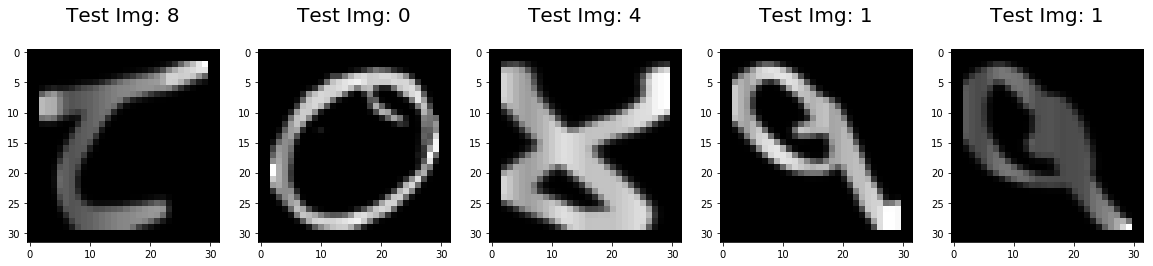

In [27]:
plt.figure(figsize=(20,4)) # let's see what the images look like. quick sanity check
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (IMG_SIZE,IMG_SIZE)), cmap=plt.cm.gray)
    plt.title('Test Img: %i\n' % label, fontsize = 20)

In [28]:
X.shape

(17000, 1024)

In [29]:
#reshape X and X_test  or we get errors
X = X.reshape(X.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

In [30]:
X.shape

(17000, 1024)

In [41]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       300
           1       0.92      0.93      0.92       300
           2       0.67      0.85      0.75       300
           3       0.79      0.61      0.69       300
           4       0.93      0.90      0.92       300
           5       0.86      0.81      0.83       300
           6       0.84      0.84      0.84       300
           7       0.85      0.82      0.83       300
           8       0.95      0.95      0.95       300
           9       0.86      0.93      0.90       300

   micro avg       0.86      0.86      0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000

[[279   0   0   0   0   0   2   9   0  10]
 [  0 278   6   1   5   1   1   2   0   6]
 [  0   4 256  21   0   4   7   5   2   1]
 [  0   2  80 183   2  12   7   4   1   9]
 [  0   5   1   2 271   

In [42]:
# save this
filename = 'devnagari_naive_bayes_86.pkl'
pickle.dump(model, open(filename, 'wb'))

In [60]:
# Knn- classification
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       300
           1       0.98      0.99      0.98       300
           2       0.92      0.97      0.95       300
           3       0.97      0.93      0.95       300
           4       0.99      1.00      0.99       300
           5       0.97      0.96      0.97       300
           6       0.99      0.97      0.98       300
           7       0.99      0.99      0.99       300
           8       0.99      1.00      0.99       300
           9       0.99      0.98      0.98       300

   micro avg       0.98      0.98      0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

[[298   0   0   0   0   0   0   0   2   0]
 [  0 297   0   0   2   0   0  

In [37]:
# save this. this one takes a long time
filename = 'devnagari_knn_98.pkl'
pickle.dump(model, open(filename, 'wb'))

In [35]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       300
           1       0.93      0.90      0.92       300
           2       0.76      0.81      0.79       300
           3       0.81      0.76      0.78       300
           4       0.94      0.90      0.92       300
           5       0.87      0.80      0.83       300
           6       0.78      0.82      0.80       300
           7       0.88      0.91      0.90       300
           8       0.89      0.90      0.89       300
           9       0.88      0.91      0.90       300

   micro avg       0.87      0.87      0.87      3000


In [36]:
# save this
filename = 'devnagari_decisiontree_87.pkl'
pickle.dump(model, open(filename, 'wb'))

In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs',random_state=10)
model.fit(X,y)
print(model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


In [39]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       300
           1       0.98      0.99      0.99       300
           2       0.85      0.88      0.86       300
           3       0.91      0.84      0.88       300
           4       0.97      0.97      0.97       300
           5       0.96      0.95      0.95       300
           6       0.93      0.94      0.93       300
           7       0.96      0.96      0.96       300
           8       0.98      0.99      0.98       300
           9       0.97      0.96      0.96       300

   micro avg       0.95      0.95      0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000

[[299   0   0   0   0   0   0   1   0   0]
 [  0 297   0   0   0   0   0   0   1   2]
 [  1   3 265  17   3   2   7   2   0   0]
 [  0   2  33 253   1   4   5   2   0   0]
 [  0   1   1   2 290   0   1   0   2   3]
 [  0   0   5   2   3 285 

In [40]:
# save this
filename = 'devnagari_logisticRegression_95.pkl'
pickle.dump(model, open(filename, 'wb'))

# Do all steps ... misclassifications ... saving the best classifier model ...

Text(0.5, 103.73999999999997, 'Predicted label')

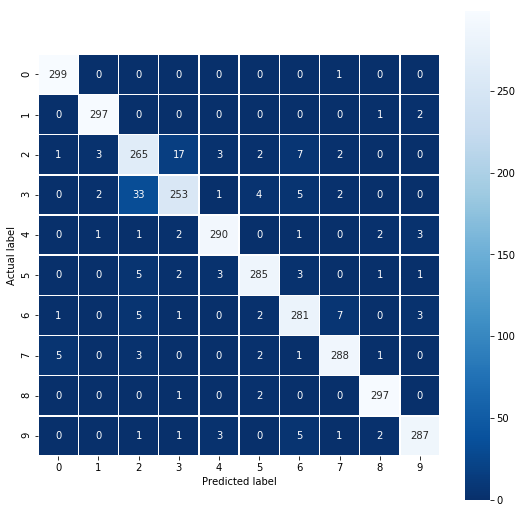

In [61]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')

In [62]:
# Returns a NumPy Array
# Predict for One Observation (image)
model.predict(X_test[0].reshape(1,-1))
yy = model.predict(X_test[0].reshape(1,-1))
print(yy[0])

8


In [64]:
# Predict for Multiple Observations (images) at Once
model.predict(X_test[0:10])

array([8, 0, 4, 1, 1, 2, 9, 9, 7, 4])

In [65]:
# Make predictions on entire test data
predictions = model.predict(X_test)

In [66]:
score = model.score(X_test,y_test)
print(score)
# note, this doesn't work with sequential models

0.9776666666666667


In [57]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
print("Number of images misclassified: ",len(misclassifiedIndexes))
print(misclassifiedIndexes[0:5])
# errors out with tensorflow/keras

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
def print_rounded_probabilities(list1):
    class_digit = 0
    for x in list1:
        y = round(x,2)
        print(class_digit,"==>",y)
        class_digit += 1

In [ ]:
# Make probabilities on entire test data
probabilities = model.predict_proba(X_test)
print(len(probabilities))
print(probabilities[0])

In [ ]:
print_rounded_probabilities(probabilities[0])

In [ ]:
print_rounded_probabilities(probabilities[8])
print(y_test[8])

In [ ]:
print_rounded_probabilities(probabilities[33])
print(y_test[33])

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (IMG_SIZE,IMG_SIZE)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[5:10]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (IMG_SIZE,IMG_SIZE)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [ ]:
# best classifier is tensorflow
# rerun and save to disk

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=5)



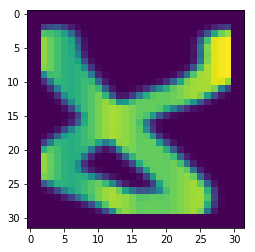

In [58]:
plt.imshow(X_test[2].reshape(32,32))

In [59]:
y_test[2]

4

In [ ]:
# can't save tensorflow/keras using pickle
# recommended using model.save, but that didn't work properly either
# will go with the second best one and that's knn
# 98%